## Dataset: Deaths Involving COVID-19 by Vaccination Status

Data URL: <https://data.ontario.ca/dataset/1375bb00-6454-4d3e-a723-4ae9e849d655/resource/2aa6e2ce-40de-4910-a737-81762e014b0b/download/deaths_by_vac_status.csv>

This dataset reports the daily reported number of the 7-day moving average rates of Deaths involving covid-19 by vaccination status and by age group.

Data includes:
- Date on which the death occured
- Age group
- 7-day moving average of the last seven days of the death rate per 100,000 for those not fully vaccinated 
- 7-day moving average of the last seven days of the death rate per 100,000 for those fully vaccinated 
- 7-day moving average of the last seven days of the death rate per 100,000 for those vaccinated with at least one booster

Data range start: March 1, 2021
Data range end: November 12, 2024

Licence: Open Government Licence - Ontario

https://data.ontario.ca/dataset/1375bb00-6454-4d3e-a723-4ae9e849d655/resource/2aa6e2ce-40de-4910-a737-81762e014b0b

In [136]:
# import the libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data Cleaning and Preprocessing

In [138]:
# Load 'Deaths Involving COVID-19 by Vaccination Status.csv' in a pandas dataframe 'df'

# load the dataset
df = pd.read_csv("Deaths Involving COVID-19 by Vaccination Status.csv")

print("\n"+"Basic Dataset Info\n".upper().center(50))
# display basic dataset info
df.info()

print(f"{'-'*30}\n"+"\n"+"Dataset\'s First Five Rows\n".upper().center(50))
# display the first 5 rows
df.head()


               BASIC DATASET INFO
                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           8892 non-null   int64  
 1   date                          8892 non-null   object 
 2   age_group                     8892 non-null   object 
 3   deaths_boost_vac_rate_7ma     8892 non-null   float64
 4   deaths_full_vac_rate_7ma      8892 non-null   float64
 5   deaths_not_full_vac_rate_7ma  8892 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 416.9+ KB
------------------------------

            DATASET'S FIRST FIVE ROWS
            


,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,8858,2021-03-01T00:00:00,0-4yrs,0.0,0.0,0.00
1,8859,2021-03-01T00:00:00,5-11yrs,0.0,0.0,0.00
2,8860,2021-03-01T00:00:00,12-17yrs,0.0,0.0,0.00
3,8861,2021-03-01T00:00:00,18-39yrs,0.0,0.0,0.00
4,8862,2021-03-01T00:00:00,40-59yrs,0.0,0.0,0.02


In [140]:
# pre-analysis for the dataset understanding (missing values, duplicates, and inconsistencies)

print(f"\n{' '*10}"+"Duplicates\n".upper())
# check for duplicates
if df.duplicated().sum() == 0: 
    print(f"There is no duplicates rows in the dataset")
else:
    print(f"Number of duplicated rows: {df.duplicated().sum()}")

print(f"{'-'*30}\n\n{' '*10}"+"Missing Values\n".upper())
# check for missing values
if df.isnull().sum().sum() == 0: 
    print(f"There is no missing values in the dataset")
else:
    print(f"Number of missing values per column:\n{df.isnull().sum()}")

print(f"{'-'*30}\n\n{' '*10}"+"Summary Statistics\n".upper())
# get summary statistics
df.describe(include="all")


          DUPLICATES

There is no duplicates rows in the dataset
------------------------------

          MISSING VALUES

There is no missing values in the dataset
------------------------------

          SUMMARY STATISTICS



,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,8892.00000,8892,8892,8892.000000,8892.000000,8892.000000
unique,NaN,1278,7,NaN,NaN,NaN
top,NaN,2021-03-01T00:00:00,ALL,NaN,NaN,NaN
freq,NaN,7,1278,NaN,NaN,NaN
mean,13303.50000,NaN,NaN,0.024245,0.023695,0.261889
std,2567.04363,NaN,NaN,0.067461,0.109072,1.218294
min,8858.00000,NaN,NaN,0.000000,0.000000,0.000000
25%,11080.75000,NaN,NaN,0.000000,0.000000,0.000000
50%,13303.50000,NaN,NaN,0.000000,0.000000,0.000000
75%,15526.25000,NaN,NaN,0.010000,0.000000,0.030000


#### Normalize and standardize data if necessary

In [142]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           8892 non-null   int64  
 1   date                          8892 non-null   object 
 2   age_group                     8892 non-null   object 
 3   deaths_boost_vac_rate_7ma     8892 non-null   float64
 4   deaths_full_vac_rate_7ma      8892 non-null   float64
 5   deaths_not_full_vac_rate_7ma  8892 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 416.9+ KB


,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,8858,2021-03-01T00:00:00,0-4yrs,0.0,0.0,0.00
1,8859,2021-03-01T00:00:00,5-11yrs,0.0,0.0,0.00
2,8860,2021-03-01T00:00:00,12-17yrs,0.0,0.0,0.00
3,8861,2021-03-01T00:00:00,18-39yrs,0.0,0.0,0.00
4,8862,2021-03-01T00:00:00,40-59yrs,0.0,0.0,0.02


In [144]:
# convert 'date' column to proper format

# identify invalid date values
# import the regular expression module
import re

# define a regex pattern for valid date formats
date_pattern =  r"(\d{4}-\d{2}-\d{2})|(\d{2}/\d{2}/\d{4})|(\d{2}-\d{2}-\d{4})"

# find rows where the 'Transaction Date' column's value does not match a valid date format
invalid_values = df[~df['date'].astype(str).str.match(date_pattern, na=False)]['date'].unique()

# display the list of invalid values
if invalid_values.size == 0:
    print("There is no invalid values in 'date' column")
else:
    print(f"List of invalid values in 'date' column: {invalid_values}")

There is no invalid values in 'date' column


In [146]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [148]:
# confirm the 'date' column data type
print(df['date'].dtype)

datetime64[ns]


In [150]:
# get summary statistics
df.describe(include="all")

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,8892.00000,8892,8892,8892.000000,8892.000000,8892.000000
unique,NaN,NaN,7,NaN,NaN,NaN
top,NaN,NaN,ALL,NaN,NaN,NaN
freq,NaN,NaN,1278,NaN,NaN,NaN
mean,13303.50000,2022-11-30 17:25:30.364372480,NaN,0.024245,0.023695,0.261889
min,8858.00000,2021-03-01 00:00:00,NaN,0.000000,0.000000,0.000000
25%,11080.75000,2022-01-12 00:00:00,NaN,0.000000,0.000000,0.000000
50%,13303.50000,2022-11-26 00:00:00,NaN,0.000000,0.000000,0.000000
75%,15526.25000,2023-10-09 00:00:00,NaN,0.010000,0.000000,0.030000
max,17749.00000,2024-11-12 00:00:00,NaN,0.810000,1.970000,18.330000


In [152]:
# standardize text columns
list_attr_to_stand = ['age_group']
for a in list_attr_to_stand:
    df[a] = df[a].str.strip().str.lower()

In [154]:
# get summary statistics
df.describe(include="all")

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,8892.00000,8892,8892,8892.000000,8892.000000,8892.000000
unique,NaN,NaN,7,NaN,NaN,NaN
top,NaN,NaN,all,NaN,NaN,NaN
freq,NaN,NaN,1278,NaN,NaN,NaN
mean,13303.50000,2022-11-30 17:25:30.364372480,NaN,0.024245,0.023695,0.261889
min,8858.00000,2021-03-01 00:00:00,NaN,0.000000,0.000000,0.000000
25%,11080.75000,2022-01-12 00:00:00,NaN,0.000000,0.000000,0.000000
50%,13303.50000,2022-11-26 00:00:00,NaN,0.000000,0.000000,0.000000
75%,15526.25000,2023-10-09 00:00:00,NaN,0.010000,0.000000,0.030000
max,17749.00000,2024-11-12 00:00:00,NaN,0.810000,1.970000,18.330000


### Convert Categorical data into numerical formats

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   _id                           8892 non-null   int64         
 1   date                          8892 non-null   datetime64[ns]
 2   age_group                     8892 non-null   object        
 3   deaths_boost_vac_rate_7ma     8892 non-null   float64       
 4   deaths_full_vac_rate_7ma      8892 non-null   float64       
 5   deaths_not_full_vac_rate_7ma  8892 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 416.9+ KB


In [158]:
# drop '_id' column as its values all unique and does not provide useful insights for analysis
df.drop(columns=['_id'], inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          8892 non-null   datetime64[ns]
 1   age_group                     8892 non-null   object        
 2   deaths_boost_vac_rate_7ma     8892 non-null   float64       
 3   deaths_full_vac_rate_7ma      8892 non-null   float64       
 4   deaths_not_full_vac_rate_7ma  8892 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 347.5+ KB


In [162]:
# define a list of categorical columns to analyze
categorical_columns = ['age_group']
# loop through each categorical column in the list
for c in categorical_columns:
    # print the column name and its unique values in the dataset
    print(f"{c}: {df[c].unique()}")  

age_group: ['0-4yrs' '5-11yrs' '12-17yrs' '18-39yrs' '40-59yrs' '60+' 'all']


In [164]:
# count records in each age group
for c in categorical_columns:
    _0_4yrs_count = (df[c] == "0-4yrs").sum()
    print(f"{c} '0-4yrs': {_0_4yrs_count}")
    _5_11yrs_count = (df[c] == "5-11yrs").sum()
    print(f"{c} '5-11yrs': {_5_11yrs_count}")
    _12_17yrs_count = (df[c] == "12-17yrs").sum()
    print(f"{c} '12-17yrs': {_12_17yrs_count}")
    _18_39yrs_count = (df[c] == "18-39yrs").sum()
    print(f"{c} '18-39yrs': {_18_39yrs_count}")
    _40_59yrs_count = (df[c] == "40-59yrs").sum()
    print(f"{c} '40-59yrs': {_40_59yrs_count}")
    _60_plus_count = (df[c] == "60+").sum()
    print(f"{c} '60+': {_60_plus_count}")
    all_count = (df[c] == "all").sum()
    print(f"{c} 'all': {all_count}")
    total_count = _0_4yrs_count + _5_11yrs_count + _12_17yrs_count + _18_39yrs_count + _40_59yrs_count + _60_plus_count + all_count
    print(f"{c} total: {total_count}")

age_group '0-4yrs': 1267
age_group '5-11yrs': 1267
age_group '12-17yrs': 1267
age_group '18-39yrs': 1268
age_group '40-59yrs': 1268
age_group '60+': 1277
age_group 'all': 1278
age_group total: 8892


In [166]:
# percentage of each age group
print(f"0-4yrs: {1267/8892}")
print(f"5-11yrs: {1267/8892}")
print(f"12-17yrs: {1267/8892}")
print(f"18-39yrs: {1268/8892}")
print(f"40-59yrs: {1268/8892}")
print(f"60+: {1277/8892}")
print(f"all: {1278/8892}")
print(f"total: {8892/8892}")

0-4yrs: 0.1424876293297346
5-11yrs: 0.1424876293297346
12-17yrs: 0.1424876293297346
18-39yrs: 0.14260008996851103
40-59yrs: 0.14260008996851103
60+: 0.14361223571749887
all: 0.1437246963562753
total: 1.0


In [168]:
# convert categorical data into numerical formats
df = pd.get_dummies(df, columns=categorical_columns)

In [170]:
# get summary statistics
df.describe(include="all")

,date,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma,age_group_0-4yrs,age_group_12-17yrs,age_group_18-39yrs,age_group_40-59yrs,age_group_5-11yrs,age_group_60+,age_group_all
count,8892,8892.000000,8892.000000,8892.000000,8892,8892,8892,8892,8892,8892,8892
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,7625,7625,7624,7624,7625,7615,7614
mean,2022-11-30 17:25:30.364372480,0.024245,0.023695,0.261889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-03-01 00:00:00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-01-12 00:00:00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-11-26 00:00:00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023-10-09 00:00:00,0.010000,0.000000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-11-12 00:00:00,0.810000,1.970000,18.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


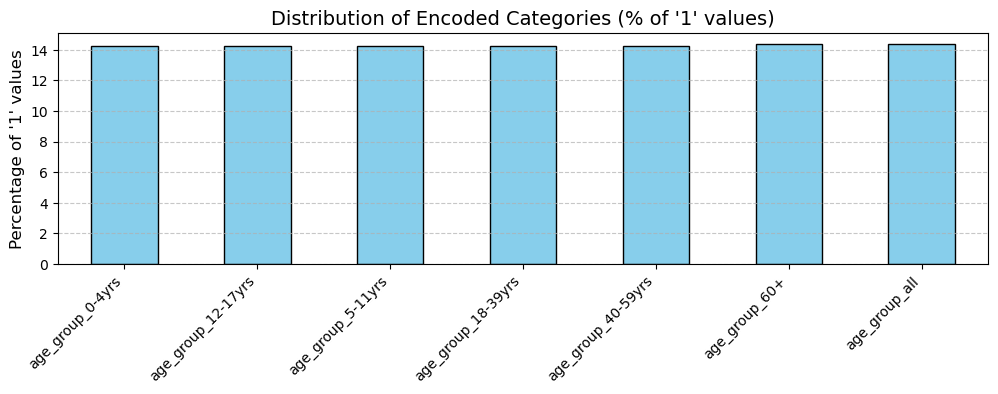

In [172]:
# import library for visualizing
import matplotlib.pyplot as plt

# select only the encoded columns (binary 0/1 columns)
encod_columns = df.iloc[:, 4:]  # first 4 columns are numerical

# calculate the percentage of '1' (True) values in each column
encod_percentages = encod_columns.mean() * 100

# Plot a bar chart of category distributions
plt.figure(figsize=(12, 3))
encod_percentages.sort_values().plot(kind="bar", color="skyblue", edgecolor="black")

# formatting
plt.title("Distribution of Encoded Categories (% of '1' values)", fontsize=14)
plt.ylabel("Percentage of '1' values", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# show plot
plt.show()

### Handle outliers using statistical techniques.

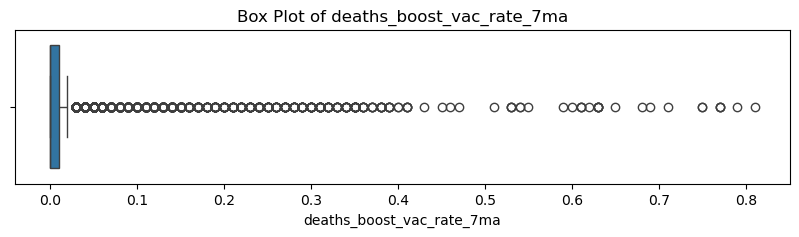

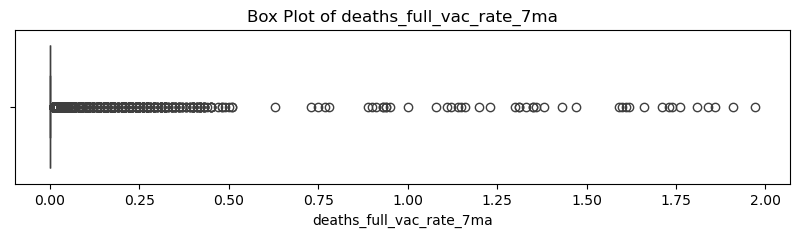

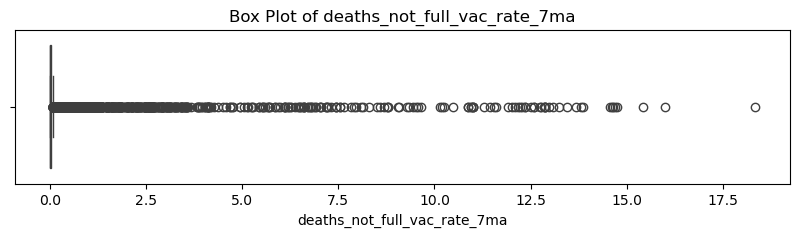

In [174]:
# detect outliers
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.boxplot(x=df["deaths_boost_vac_rate_7ma"])
plt.title("Box Plot of deaths_boost_vac_rate_7ma")
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df["deaths_full_vac_rate_7ma"])
plt.title("Box Plot of deaths_full_vac_rate_7ma")
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df["deaths_not_full_vac_rate_7ma"])
plt.title("Box Plot of deaths_not_full_vac_rate_7ma")
plt.show()

In [176]:
# Calculate Q1 and Q3
Q1 = df["deaths_boost_vac_rate_7ma"].quantile(0.25)
Q3 = df["deaths_boost_vac_rate_7ma"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df[(df["deaths_boost_vac_rate_7ma"] < lower_bound) | (df["deaths_boost_vac_rate_7ma"] > upper_bound)]

total_outliers_boost = outliers_iqr.shape[0]
print(f"Total outliers detected in 'deaths_boost_vac_rate_7ma': {total_outliers_boost}")
print(f"Outlier range: {lower_bound:.2f} to {upper_bound:.2f}")
print(f"Unique outlier values: {outliers_iqr['deaths_boost_vac_rate_7ma'].unique()}")

Total outliers detected in 'deaths_boost_vac_rate_7ma': 1682
Outlier range: -0.01 to 0.03
Unique outlier values: [0.19 0.15 0.35 0.28 0.17 0.13 0.12 0.1  0.07 0.05 0.14 0.09 0.08 0.06
 0.04 0.11 0.03 0.24 0.16 0.3  0.2  0.31 0.37 0.23 0.45 0.27 0.54 0.63
 0.36 0.6  0.34 0.61 0.62 0.33 0.65 0.68 0.71 0.77 0.39 0.81 0.41 0.75
 0.79 0.38 0.69 0.29 0.59 0.53 0.25 0.55 0.51 0.46 0.47 0.21 0.43 0.32
 0.22 0.18 0.26 0.4 ]


In [178]:
# Calculate Q1 and Q3
Q1 = df["deaths_full_vac_rate_7ma"].quantile(0.25)
Q3 = df["deaths_full_vac_rate_7ma"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df[(df["deaths_full_vac_rate_7ma"] < lower_bound) | (df["deaths_full_vac_rate_7ma"] > upper_bound)]

total_outliers_full = outliers_iqr.shape[0]
print(f"Total outliers detected in 'deaths_full_vac_rate_7ma': {total_outliers_full}")
print(f"Outlier range: {lower_bound:.2f} to {upper_bound:.2f}")
print(f"Unique outlier values: {outliers_iqr['deaths_full_vac_rate_7ma'].unique()}")

Total outliers detected in 'deaths_full_vac_rate_7ma': 2217
Outlier range: 0.00 to 0.00
Unique outlier values: [0.1  0.05 0.09 0.04 0.08 0.16 0.22 0.11 0.3  0.14 0.36 0.18 0.07 0.2
 0.27 0.13 0.06 0.03 0.19 0.25 0.12 0.32 0.15 0.38 0.31 0.21 0.02 0.01
 0.41 0.4  0.48 0.51 0.63 0.75 0.17 0.78 0.94 1.08 0.23 1.23 1.31 1.33
 0.26 1.35 1.43 0.28 1.47 0.29 1.61 1.71 0.33 1.74 1.84 0.35 1.97 0.37
 1.91 1.86 0.34 1.81 1.76 1.73 1.62 1.66 1.59 1.6  1.36 1.3  1.38 1.15
 1.12 1.16 1.2  1.14 1.11 0.95 1.   0.93 0.91 0.89 0.9  0.77 0.73 0.49
 0.45 0.5  0.43 0.24 0.39 0.44 0.47 0.42]


In [180]:
# Calculate Q1 and Q3
Q1 = df["deaths_not_full_vac_rate_7ma"].quantile(0.25)
Q3 = df["deaths_not_full_vac_rate_7ma"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df[(df["deaths_not_full_vac_rate_7ma"] < lower_bound) | (df["deaths_not_full_vac_rate_7ma"] > upper_bound)]

total_outliers_not_full = outliers_iqr.shape[0]
print(f"Total outliers detected in 'deaths_not_full_vac_rate_7ma': {total_outliers_not_full}")
print(f"Outlier range: {lower_bound:.2f} to {upper_bound:.2f}")
print(f"Unique outlier values: {outliers_iqr['deaths_not_full_vac_rate_7ma'].unique()}")

Total outliers detected in 'deaths_not_full_vac_rate_7ma': 1652
Outlier range: -0.04 to 0.07
Unique outlier values: [ 0.35  0.09  0.34  0.32  0.33  0.3   0.08  0.29  0.31  0.27  0.26  0.28
  0.36  0.41  0.1   0.45  0.11  0.47  0.12  0.44  0.42  0.43  0.52  0.14
  0.56  0.15  0.54  0.6   0.67  0.18  0.66  0.17  0.68  0.61  0.65  0.19
  0.69  0.72  0.2   0.78  0.21  0.79  0.82  0.22  0.84  0.23  0.87  0.8
  0.76  0.73  0.13  0.58  0.62  0.16  0.63  0.49  0.46  0.48  0.39  0.38
  0.25  0.24  0.37  0.59  0.89  1.04  0.96  0.97  1.07  1.03  0.71  0.9
  0.91  0.98  1.21  1.1   0.83  0.95  0.85  0.86  0.81  0.94  1.18  1.06
  1.01  1.08  1.02  0.74  1.09  1.11  1.05  0.88  0.64  1.19  1.2   1.36
  1.22  1.32  1.4   1.33  1.26  1.34  0.99  1.    1.25  1.59  1.85  1.77
  1.69  1.61  1.62  1.45  1.12  1.6   1.79  1.88  1.8   1.54  2.    2.46
  2.2   2.3   2.41  2.6   2.33  2.35  2.54  2.65  2.95  3.25  3.56  4.15
  3.88  4.38  4.69  5.69  6.2   6.61  7.04  7.65  8.77 10.2  10.14 10.88
  0.51 12.

In [182]:
print("Percentages of outliers detected in dataframe for next vaccination status:")
print(f"boost: {total_outliers_boost/df.shape[0]*100:.1f}%")
print(f"full: {total_outliers_full/df.shape[0]*100:.1f}%")
print(f"not_full: {total_outliers_not_full/df.shape[0]*100:.1f}%")
# print(df.shape[0])

Percentages of outliers detected in dataframe for next vaccination status:
boost: 18.9%
full: 24.9%
not_full: 18.6%


Since the outliers are not errors, but still too extreme the best solution is to cap them at the 95th persentile using Winzorization

In [184]:
from scipy.stats.mstats import winsorize

df["deaths_boost_vac_rate_7ma"] = winsorize(df["deaths_boost_vac_rate_7ma"], limits=[0, 0.05])  # capping 5% on the right tail
df["deaths_full_vac_rate_7ma"] = winsorize(df["deaths_full_vac_rate_7ma"], limits=[0, 0.05])  # capping 5% on the right tail
df["deaths_not_full_vac_rate_7ma"] = winsorize(df["deaths_not_full_vac_rate_7ma"], limits=[0, 0.05])  # capping 5% on the right tail

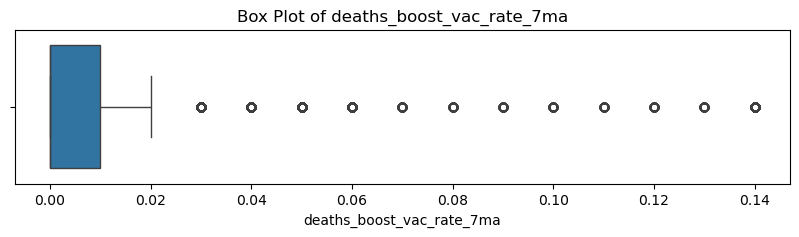

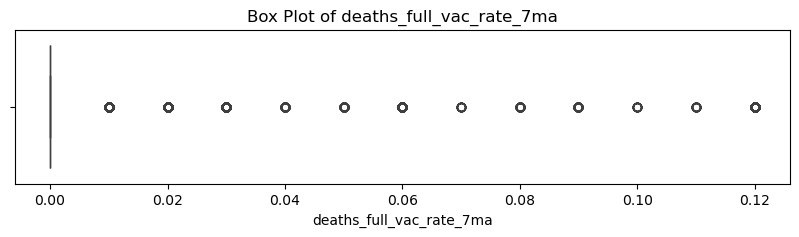

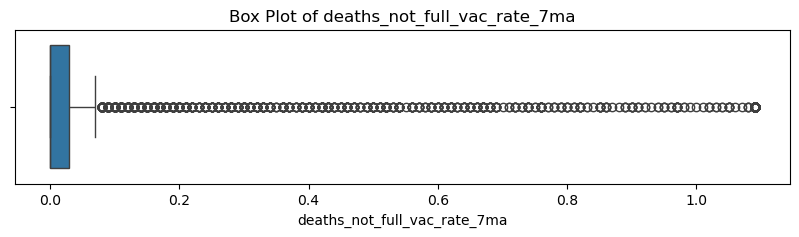

In [186]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df["deaths_boost_vac_rate_7ma"])
plt.title("Box Plot of deaths_boost_vac_rate_7ma")
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df["deaths_full_vac_rate_7ma"])
plt.title("Box Plot of deaths_full_vac_rate_7ma")
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df["deaths_not_full_vac_rate_7ma"])
plt.title("Box Plot of deaths_not_full_vac_rate_7ma")
plt.show()

In [188]:
# save the cleaned dataframe as 'cleaned_deaths_involving_covid-19_by_vaccination_status_df'
df.to_csv('cleaned_deaths_involving_covid-19_by_vaccination_status_df.csv', index=None)